<a href="https://colab.research.google.com/github/Alimustoofaa/DatasetContainerNumber/blob/master/Container_Instance_Segmentation_with_COCO_dataformat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microcontroller Instance Segmentation with COCO dataformat
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Detectron2-Train-a-Instance-Segmentation-Model/blob/master/Microcontroller_Instance_Segmentation_with_COCO_dataformat.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Detectron2-Train-a-Instance-Segmentation-Model/blob/master/Microcontroller_Instance_Segmentation_with_COCO_dataformat.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install detectron2

> **Important**: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/facebookresearch/detectron2/blob/master/INSTALL.md). This notebook includes only what's necessary to run in Colab.

In [ ]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 100kB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 276kB 4.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=6dc63e9c08cfec2e27475ad05b1195941410e482efd90a5f34f7cdef05ee106c
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-bu

In [ ]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.7MB 9.4MB/s 
     |████████████████████████████████| 2.2MB 13.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20200912-cp36-none-any.whl size=43996 sha256=8c60cf89fdf88a10182fd75bfb1a17c89a7aca5f3cfcf65f7142c00884852e10
  Stored in directory: /root/.cache/pip/wheels/34/41/7b/f0a0b5800bea0474ae553342bde52093fdd5852764463aa2ec
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=266521 sha256=34ec44a836a6a2699af65f1b50c9a749b3702b84f0ae51a1b892a37908675c9b
  Stored in directory: /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e
Successfully built fvcore pycocotools
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully unin

## Get data

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

## Get Dataset from Google drive

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1OTzOdwLMEkKV4o-ZWBiaI8fWLRwM_296"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Container_Number_Segmentation.zip')        # replace the file name with your file

In [ ]:
!unzip Container_Number_Segmentation.zip

Archive:  Container_Number_Segmentation.zip
   creating: Container Number Segmentation/
   creating: Container Number Segmentation/test/
  inflating: Container Number Segmentation/test/1907172130437010601.json  
  inflating: Container Number Segmentation/test/1907172127186010602.jpg  
  inflating: Container Number Segmentation/test/1907172127186010602.json  
  inflating: Container Number Segmentation/test/1907172127186010605.jpg  
  inflating: Container Number Segmentation/test/1907172127186010605.json  
  inflating: Container Number Segmentation/test/1907172127186010606.jpg  
  inflating: Container Number Segmentation/test/1907172127186010606.json  
  inflating: Container Number Segmentation/test/1907172127186010609.jpg  
  inflating: Container Number Segmentation/test/1907172127186010609.json  
  inflating: Container Number Segmentation/test/1907172127186010610.jpg  
  inflating: Container Number Segmentation/test/1907172127186010610.json  
  inflating: Container Number Segmentation/

In [ ]:
!ls 'Container Number Segmentation'

labelme2coco.py  test  test.json  train  train.json


## Register data-set

In order to use a dataset with Detectron2 we need to register it. For more information check out the official documentation.

In [ ]:
from detectron2.data.datasets import register_coco_instances

for d in ["train", "test"]:
    register_coco_instances(f"containernumber_{d}", {}, f"Container Number Segmentation/{d}.json", f"Container Number Segmentation/{d}")

WARNING [09/17 09:21:22 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/17 09:21:22 d2.data.datasets.coco]: Loaded 81 images in COCO format from Container Number Segmentation/train.json
WARNING [09/17 09:21:22 d2.data.datasets.coco]: Filtered out 7 instances without valid segmentation. There might be issues in your dataset generation process. A valid polygon should be a list[float] with even length >= 6.


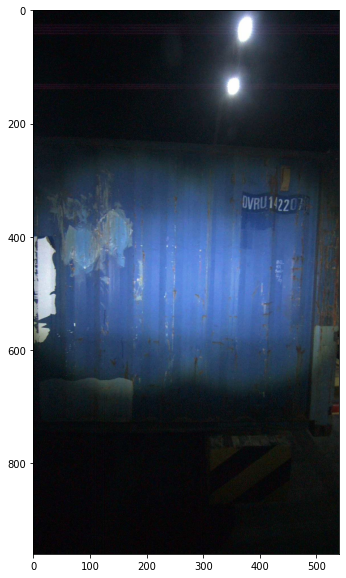

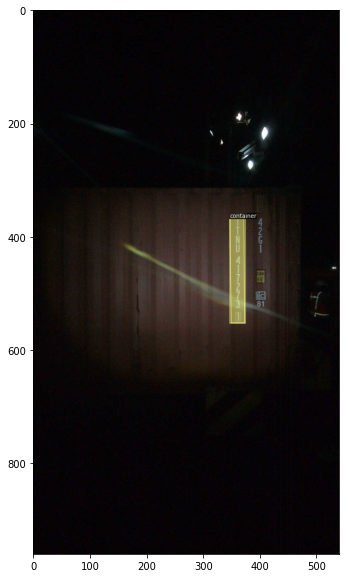

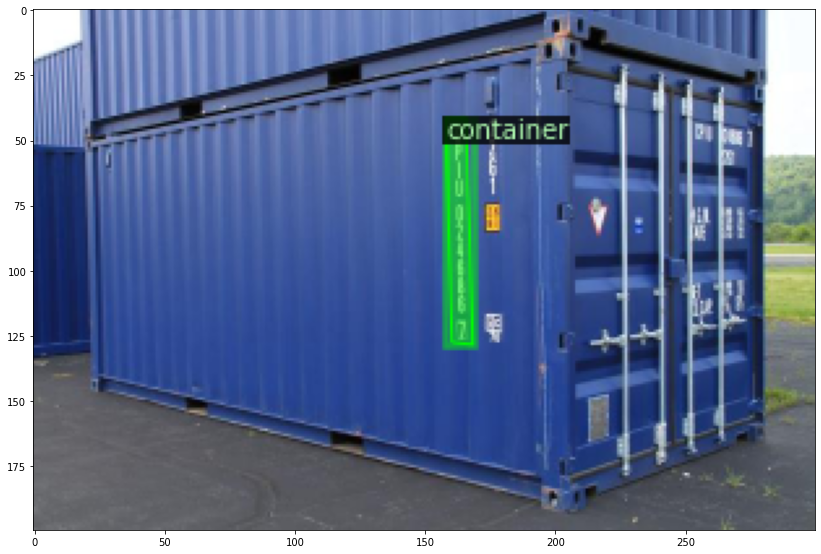

In [ ]:
import random
from detectron2.data import DatasetCatalog, MetadataCatalog

dataset_dicts = DatasetCatalog.get("containernumber_train")
containernumber_metadata = MetadataCatalog.get("containernumber_train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=containernumber_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Train model

Now, let's fine-tune a pretrained FasterRCNN instance segmentation model on the microcontroller data-set.

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("containernumber_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.BASE_LR = 0.00025
# cfg.SOLVER.MAX_ITER = 1000
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.TEST.EVAL_PERIOD = 500

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[09/17 09:25:55 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f6e8b1.pkl: 243MB [00:03, 64.6MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.


[09/17 09:26:00 d2.engine.train_loop]: Starting training from iteration 0
[09/17 09:26:15 d2.utils.events]:  eta: 0:16:52  iter: 19  total_loss: 0.992  loss_cls: 0.473  loss_box_reg: 0.068  loss_rpn_cls: 0.389  loss_rpn_loc: 0.048  time: 0.6981  data_time: 0.0859  lr: 0.000005  max_mem: 3914M
[09/17 09:26:30 d2.utils.events]:  eta: 0:16:59  iter: 39  total_loss: 0.859  loss_cls: 0.428  loss_box_reg: 0.027  loss_rpn_cls: 0.321  loss_rpn_loc: 0.025  time: 0.7209  data_time: 0.1202  lr: 0.000010  max_mem: 3914M
[09/17 09:26:43 d2.utils.events]:  eta: 0:16:45  iter: 59  total_loss: 0.720  loss_cls: 0.362  loss_box_reg: 0.096  loss_rpn_cls: 0.280  loss_rpn_loc: 0.035  time: 0.7083  data_time: 0.0196  lr: 0.000015  max_mem: 3914M
[09/17 09:26:58 d2.utils.events]:  eta: 0:16:32  iter: 79  total_loss: 0.812  loss_cls: 0.335  loss_box_reg: 0.138  loss_rpn_cls: 0.157  loss_rpn_loc: 0.028  time: 0.7137  data_time: 0.0668  lr: 0.000020  max_mem: 3914M
[09/17 09:27:13 d2.utils.events]:  eta: 0:16:3

## Use model for inference

Now, we can perform inference on our validation set by creating a predictor object.

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("containernumber_test", )
predictor = DefaultPredictor(cfg)

WARNING [09/17 09:44:47 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/17 09:44:47 d2.data.datasets.coco]: Loaded 13 images in COCO format from Container Number Segmentation/test.json


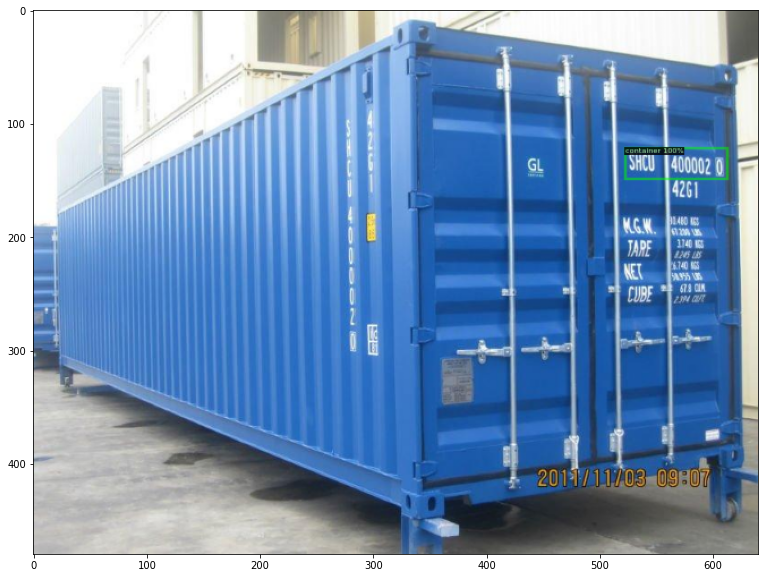

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("containernumber_test")
for d in random.sample(dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=containernumber_metadata, 
                   scale=0.8
                  #  instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # print(outputs["instances"])
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
containernumber_metadata

Metadata(evaluator_type='coco', image_root='Container Number Segmentation/train', json_file='Container Number Segmentation/train.json', name='containernumber_train', thing_classes=['container'], thing_dataset_id_to_contiguous_id={0: 0})

In [ ]:
import time
times = []
for i in range(20):
    start_time = time.time()
    outputs = predictor(im)
    delta = time.time() - start_time
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print("Average(sec):{:.2f},fps:{:.2f}".format(mean_delta, fps))

Average(sec):0.17,fps:6.04


Test

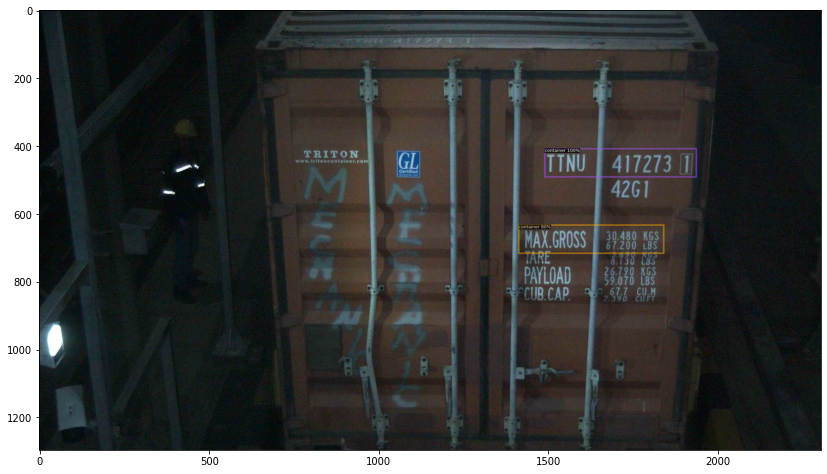

In [ ]:
im = cv2.imread('/content/1907172159070010610.jpg')
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

Score :  0.996221661567688


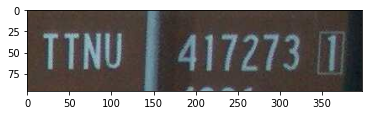

In [ ]:
import uuid 

boxes = {}
score_array = []
img_crop_array = []
for i, coordinates in enumerate(outputs["instances"].to("cpu").pred_boxes, start=0):
  score_array.append(outputs["instances"].scores[i].item())
  coordinates_array = []
  for k in coordinates:
    coordinates_array.append(int(k))
  boxes[uuid.uuid4().hex[:].upper()] = coordinates_array

for k,v in boxes.items():
  crop_img = im[v[1]-13:v[3]+13, v[0]-13:v[2]+13, :]
  img_crop_array.append(crop_img)

score_hight = max(range(len(score_array)), key=score_array.__getitem__)
print('Score : ', score_array[score_hight])
plt.imshow(cv2.cvtColor(img_crop_array[score_hight], cv2.COLOR_BGR2RGB))
plt.show()
plt.imsave('test.jpg', cv2.cvtColor(img_crop_array[score_hight], cv2.COLOR_BGR2RGB))

## Save model to Drive

Connect to your drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive/

In [ ]:
!cp -r output /content/drive/My\ Drive/HALOTEC/CONTAINER_NUMBER_V2/Faster_RNN
# model_save_name = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# path = F"/content/gdrive/My Drive/{model_save_name}"

In [ ]:
!ls drive/My\ Drive/HALOTEC/CONTAINER_NUMBER_V2/Faster_RNN/output

events.out.tfevents.1600328038.ae188f7eadc0.280.0  metrics.json
last_checkpoint					   model_final.pth
